In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

movie = pd.read_csv('./data/movie.csv', index_col='movie_title')
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [2]:
fb_likes.describe(percentiles=[.1,.25,.5,.75,.9]).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int64

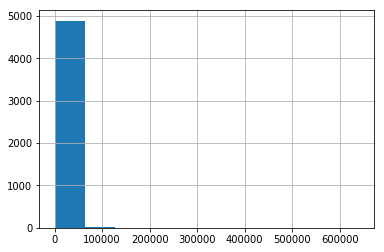

In [3]:
fb_likes.hist()

In [4]:
criteria_high = fb_likes < 20000
criteria_high.mean().round(2)

0.91

In [6]:
fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [7]:
fb_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [11]:
criteria_low = fb_likes > 300
fb_likes_cap = fb_likes.where(criteria_high, other=20000).where(criteria_low, 300)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [12]:
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

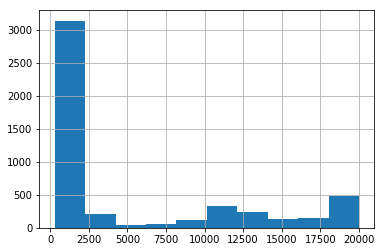

In [13]:
fb_likes_cap.hist()

In [14]:
fb_likes_cap2 = fb_likes.clip(lower=300, upper=20000)
fb_likes_cap2.equals(fb_likes_cap)

True